## Load Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


/Users/yosefdanan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_data():
    df_train = pd.read_csv("./titanic/train.csv")
    df_test = pd.read_csv("./titanic/test.csv")
    df = pd.concat([df_test,df_train])
    return df

In [3]:
df = load_data()
df.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64

In [4]:
df = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
df = df[df['Survived'].notna()]
df = df[df['Embarked'].notna()]
df = df[df['Age'].notna()]
df.isna().sum(), df.shape

(Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Parch       0
 Fare        0
 Embarked    0
 Survived    0
 dtype: int64,
 (712, 8))

In [5]:
df["Sex"] = pd.Categorical(df["Sex"]).codes
df["Embarked"] = pd.Categorical(df["Embarked"]).codes
df["Fare"] = (df["Fare"]-df["Fare"].mean())/df["Fare"].std()

In [6]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,-0.516017,2,0.0
1,1,0,38.0,1,0,0.693558,0,1.0
2,3,0,26.0,0,0,-0.503267,2,1.0
3,1,0,35.0,1,0,0.350080,2,1.0
4,3,1,35.0,0,0,-0.500905,2,0.0
...,...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,-0.102803,1,0.0
886,2,1,27.0,0,0,-0.407401,2,0.0
887,1,0,19.0,0,0,-0.086274,2,1.0
889,1,1,26.0,0,0,-0.086274,0,1.0


In [7]:
columns_to_categorical = ["SibSp", "Pclass", "Embarked","Parch"]
for col_name in columns_to_categorical:
    print(df[col_name].value_counts())
    df = pd.concat([df, pd.get_dummies(df[col_name],prefix=col_name)],axis=1)
    df = df.drop(col_name, axis=1)
df.head()

0    469
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64
3    355
1    184
2    173
Name: Pclass, dtype: int64
2    554
0    130
1     28
Name: Embarked, dtype: int64
0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


,Sex,Age,Fare,Survived,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,...,Embarked_0,Embarked_1,Embarked_2,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,22.0,-0.516017,0.0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,0,38.0,0.693558,1.0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,26.0,-0.503267,1.0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,35.0,0.350080,1.0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,1,35.0,-0.500905,0.0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [8]:
X = df.drop("Age",axis=1)
y = df["Age"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

<AxesSubplot:>

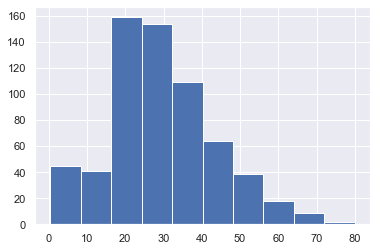

In [9]:
y_train.hist()

In [10]:
def knn_example(nbrs, smaple_index):
    sample = X_test.iloc[smaple_index].values
    distances, indices = nbrs.kneighbors(np.expand_dims(sample, axis=0))
    pd.Series(y_train.iloc[indices[0,:]]).hist()
    print(y_test.iloc[smaple_index])
    return distances, indices

def knn_predict(model, X_test, mistake_thr=10):
    mean_pred = []
    median_pred = []
    mode_pred = []
    for neg_indcies in indices:
        age_neighbors = y_train.iloc[neg_indcies]
        mean_pred.append(int(age_neighbors.mean()))
        median_pred.append(int(age_neighbors.median()))
        mode_pred.append(int(age_neighbors.mode()[0]))
    real_res = y_test.values.astype(int)
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,7))
    mean_pred_dist = np.abs(mean_pred-real_res)
    ax1.hist(mean_pred_dist)
    ax1.set_title("KNN - Mean Prediction Diffrences")
    median_pred_dist = np.abs(median_pred-real_res)
    ax2.hist(np.abs(median_pred-real_res))
    ax2.set_title("KNN - Median Prediction Diffrences")
    mode_pred_dist = np.abs(mode_pred-real_res)
    ax3.hist(mode_pred_dist)
    ax2.set_title("KNN - Mode Prediction Diffrences")
    plt.show()
    print(f"Mean Accuracy: {(mean_pred_dist > mistake_thr).sum() / len(mean_pred)}")
    print(f"Median Accuracy: {(median_pred_dist > mistake_thr).sum() / len(mean_pred)}")
    print(f"Mode Accuracy: {(mode_pred_dist > mistake_thr).sum() / len(mean_pred)}")
    return mean_pred, median_pred, mode_pred

34.0


/Users/yosefdanan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


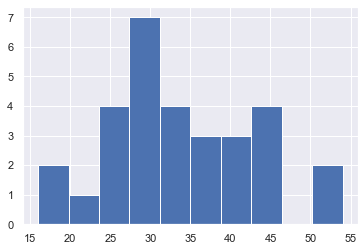

In [11]:
k=30
model = NearestNeighbors(n_neighbors=k, algorithm='ball_tree', metric='euclidean').fit(X_train)
distances, indices = knn_example(model,smaple_index=50)

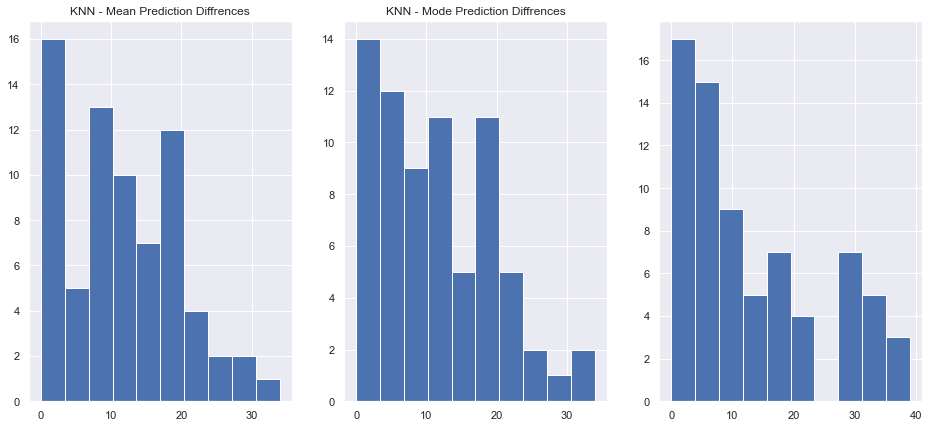

Mean Accuracy: 0.5277777777777778
Median Accuracy: 0.5138888888888888
Mode Accuracy: 0.4583333333333333


In [12]:
distances, indices = model.kneighbors(X_test)
mean_pred, median_pred, mode_pred = knn_predict(distances, indices)

In [13]:
probs = y_train.value_counts() / len(y_train)
random_pred = [np.random.choice(probs.index, p=probs.values) for _ in range(y_test.size)]

In [21]:
def plot_distances_over_knn_result(neighbres_indices, y_indcies):
    f, axs = plt.subplots(y_indcies.size,2, figsize=(16,16))
    for i, (ne_index, y_index) in enumerate(zip(neighbres_indices, y_indcies)):
        ax = axs[i][0]
        ax.hist(y_train.iloc[ne_index],alpha=0.5, label='x')
        ax.axvline(x=y_test.iloc[y_index], color="red")
        ax.axvline(x=mean_pred[y_index], color="green")
        ax.axvline(x=mode_pred[y_index], color="yellow")
        ax.axvline(x=median_pred[y_index], color="black")
        ax.axvline(x=random_pred[y_index], color="purple")
        sum_distances = dict()
        for age in y_train.unique():
            ne_dist = distances[np.where(y_train.iloc[ne_index] == age),:]
            curr_sum = np.square(ne_dist).sum()
            if ne_dist.size > 0:
                sum_distances[age] = curr_sum / ne_dist.size
        axs[i][1].scatter(sum_distances.keys(),sum_distances.values(),alpha=0.5, label='y', color="black")
        axs[i][1].axvline(x=y_test.iloc[y_index], color="red")      
    f.legend(["Ages",'True', 'Mean',"Mode" ,"Median", "Random"])

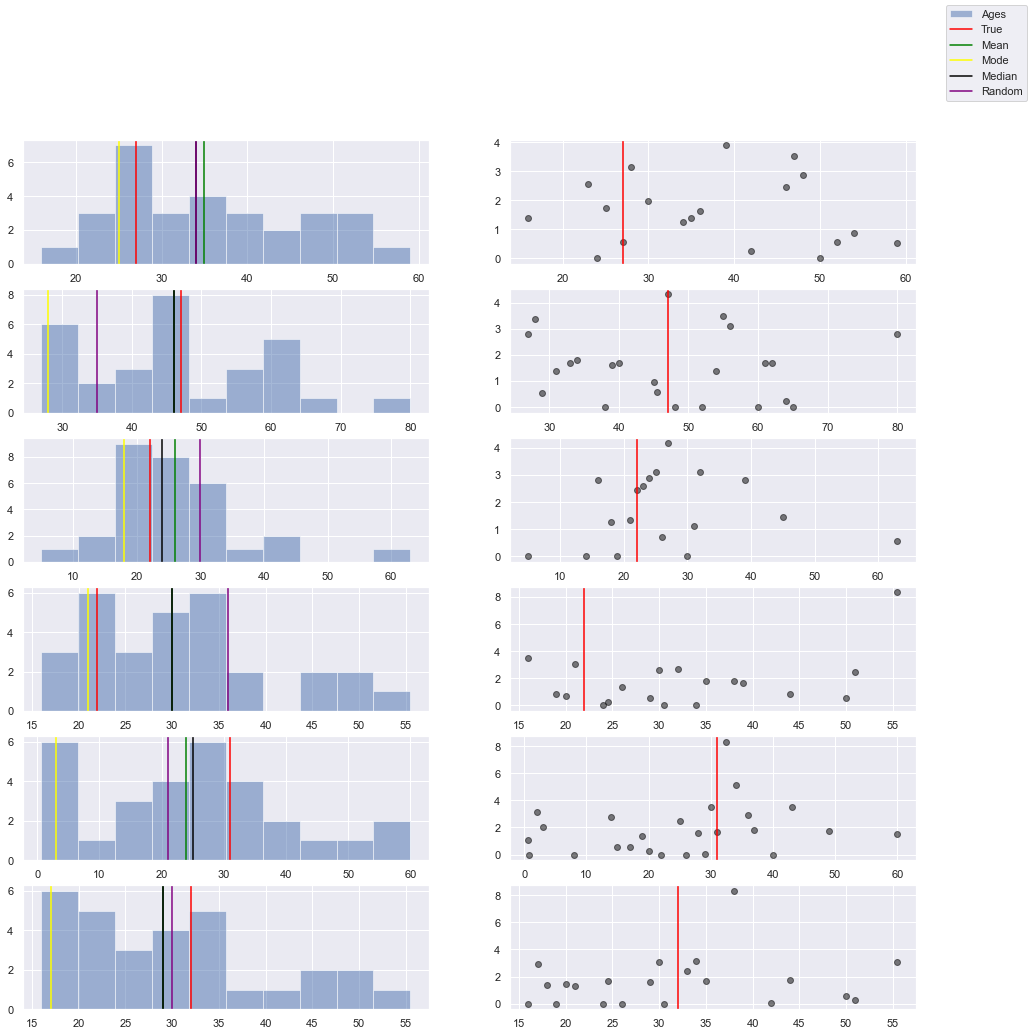

In [22]:
examples_number=6
thrshold = 10
mean_pred_dist = np.abs(mean_pred-y_test.values.astype(int))
neighbres_indices = indices[mean_pred_dist <= thrshold, :][:examples_number]
y_indcies = np.where(mean_pred_dist <= thrshold)[0][:examples_number]
plot_distances_over_knn_result(neighbres_indices, y_indcies)

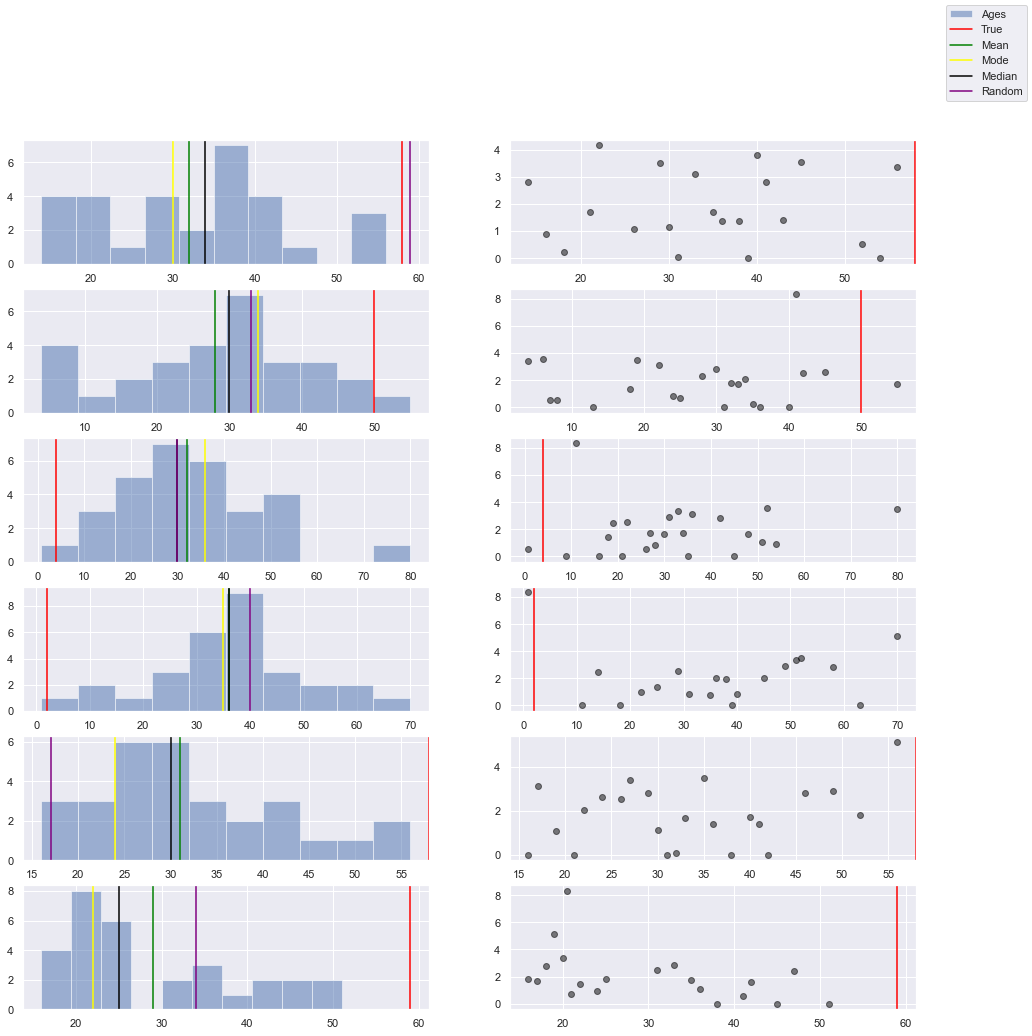

In [23]:
examples_number=6
thrshold = 20
mean_pred_dist = np.abs(mean_pred-y_test.values.astype(int))
neighbres_indices = indices[mean_pred_dist > thrshold, :][:examples_number]
y_indcies = np.where(mean_pred_dist > thrshold)[0][:examples_number]
plot_distances_over_knn_result(neighbres_indices, y_indcies)

### add evalution by svm

### Try MLP

## Use Stat to get the distrabution

- dicide which feature to work with - perfer categorical

In [24]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [26]:
get_best_distribution(y_train)

p value for norm = 0.007641010644133528
p value for exponweib = 1.5909596268062747e-233
p value for weibull_max = 0.018215486845721725


/Users/yosefdanan/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:1726: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
/Users/yosefdanan/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu


p value for weibull_min = 0.0
p value for pareto = 7.888373474824522e-61
p value for genextreme = 0.018213706247392207
Best fitting distribution: weibull_max
Best p value: 0.018215486845721725
Parameters for the best fit: (6.134164959589137, 105.26233886451362, 81.23039614280934)


('weibull_max',
 0.018215486845721725,
 (6.134164959589137, 105.26233886451362, 81.23039614280934))

In [33]:
r = weibull_max.rvs((6.134164959589137, 105.26233886451362, 81.23039614280934), size=(1000,1))

ValueError: size does not match the broadcast shape of the parameters. (1000, 1), (1000, 1), (1, 3)

## Make missing rate of 10%


## Fill with mean and see the effect of the distrabution

## Fill with simple knn

## KNN with our approch of using the 90% distrabution

## Notes - evalution

- for categorical it's easy use perscion,recall,accuracy
- for numerical use mean squred error in compare to other result

## Make missing rate of 20%